# *Chain code*

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
def get_Boundary(img):
  from skimage.measure import find_contours
  contours = find_contours(img, 0.5)
  binary_contours = np.zeros_like(img, dtype=np.uint8)

  for contour in contours:
      contour = np.round(contour).astype(int)
      binary_contours[contour[:, 0], contour[:, 1]] = 1
  return binary_contours

def findChainCode(perimeter):
    sz = perimeter.shape
    chainCodeMap = np.zeros(sz)
    sy, sx = np.where(perimeter == 1)
    startPt = [sy[0], sx[0]]
    currentPt = startPt
    #directions = np.array([[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]])
    directions = np.array([[0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1], [1, 0], [1, 1]])
    dir = 0
    n=0
    chainCodeIndex = 0
    chainCode = []

    while True:
        n=n+1
        if n>=600:
          return np.array(chainCode), chainCodeMap

        for i in range(8):
            nextPt = currentPt + directions[dir]
            validPosn = 0
            #print("fir",currentPt)

            if (0 < nextPt[0] < sz[0]) and (0 < nextPt[1] < sz[1]):
                validPosn = 1

            if validPosn and perimeter[nextPt[0], nextPt[1]] == 1:
                chainCode.append(dir)
                chainCodeMap[currentPt[0], currentPt[1]] = dir
                chainCodeIndex += 1
                currentPt = nextPt
                dir = dir - 3
                #print(currentPt)

                if dir < 0:
                    dir += 8
                break
            else:
                #print(currentPt)
                dir = dir + 1

                if dir >= 8:
                    dir = 0

        if np.array_equal(currentPt, startPt):
            break

    return np.array(chainCode), chainCodeMap

def first_difference(chain_code):
    # Calculate the first difference of the chain code
    first_diff = np.roll(chain_code, -1) - chain_code
    first_diff[first_diff <= -1] += 8
    # Move the last element to the beginning of the array
    first_diff = np.roll(first_diff, 1)

    return first_diff

def circular_difference(chain_code):
    # Calculate the circular difference after a minimum circular shift
    min_shift = min(chain_code)
    min_shift_index = np.where(chain_code == min_shift)[0][0]
    circular_diff = np.roll(chain_code, -min_shift_index)
    return circular_diff


# *Try example*

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]]


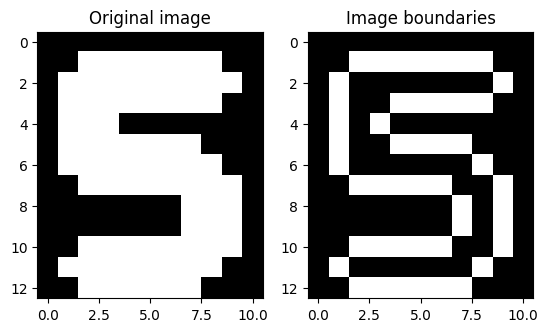

Chain Code: [0 0 0 0 0 0 7 5 4 4 4 4 5 7 0 0 0 7 7 6 6 6 5 5 4 4 4 4 4 3 1 0 0 0 0 1 2
 3 4 4 4 4 3 2 2 2 2 1]
First Difference: [7 0 0 0 0 0 7 6 7 0 0 0 1 2 1 0 0 7 0 7 0 0 7 0 7 0 0 0 0 7 6 7 0 0 0 1 1
 1 1 0 0 0 7 7 0 0 0 7]
Circular Difference after minimum circular shift: [0 0 0 0 0 7 6 7 0 0 0 1 2 1 0 0 7 0 7 0 0 7 0 7 0 0 0 0 7 6 7 0 0 0 1 1 1
 1 0 0 0 7 7 0 0 0 7 7]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def getImgBoundary(bw_img):
    sz = np.shape(bw_img)
    boundaryImg = np.zeros(sz)
    imgPadded = np.zeros((sz[0] + 2, sz[1] + 2))
    imgPadded[1:-1, 1:-1] = bw_img
    for i in range(1, sz[0] + 1):
        for j in range(1, sz[1] + 1):
            if imgPadded[i, j]:
                if not imgPadded[i - 1, j] or not imgPadded[i + 1, j] or not imgPadded[i, j - 1] or not imgPadded[
                    i, j + 1]:
                    boundaryImg[i - 1, j - 1] = 1
    return boundaryImg

img = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
                [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0]])

boundaryImg = getImgBoundary(img)
print(boundaryImg)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(boundaryImg, cmap='gray')
axs[1].set_title('Image boundaries')
plt.show()

chCode, chMap = findChainCode(boundaryImg)

chMap -= 1
#chCode = 1  # 0 to 7 instead of 1 to 8

# Calculate first difference
first_diff = first_difference(chCode)

# Calculate circular difference
circular_diff = circular_difference(first_diff)

print("Chain Code:", chCode)

print("First Difference:", first_diff)
print("Circular Difference after minimum circular shift:", circular_diff)


# Working on mnist data

In [ ]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

img= X_train

11490434/11490434 [==============================] - 0s 0us/step


# *Try sample from mnist*

chain_code [0 0 7 7 6 5 5 4 5 5 5 5 6 5 5 1 0 0 0 7 7 6 6 6 5 6 5 4 5 5 4 4 4 4 4 4 3
 3 3 2 2 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1]
first_diff_ [7 0 7 0 7 7 0 7 1 0 0 0 1 7 0 4 7 0 0 7 0 7 0 0 7 1 7 7 1 0 7 0 0 0 0 0 7
 0 0 7 0 0 7 1 7 0 0 0 0 1 7 0 0 0 0 0 0]
circular_difference [0 7 0 7 7 0 7 1 0 0 0 1 7 0 4 7 0 0 7 0 7 0 0 7 1 7 7 1 0 7 0 0 0 0 0 7 0
 0 7 0 0 7 1 7 0 0 0 0 1 7 0 0 0 0 0 0 7]


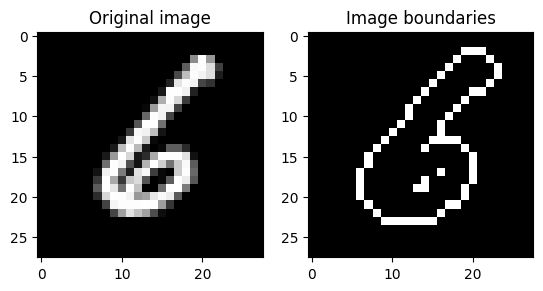

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 

In [ ]:
bound = get_Boundary(X_train[3])
chainCode,_ = findChainCode(bound)
print("chain_code",chainCode)
first_diff_ = first_difference(chainCode)
print("first_diff_",first_diff_)
print("circular_difference",circular_difference(first_diff_))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(X_train[3], cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(bound, cmap='gray')
axs[1].set_title('Image boundaries')
plt.show()
print(bound)

In [ ]:
def extract_chain_code_features(images):
    features = []
    for image in images:
        bound = get_Boundary(image)
        chain_code,_ = findChainCode(bound)
        features.append(chain_code)
    return features

X_train_ = extract_chain_code_features(X_train)
X_test_ = extract_chain_code_features(X_test)

In [ ]:
max_length = max(len(vec) for vec in X_train_)

# Pad or truncate feature vectors to ensure consistent length
#train_features = [vec + [0] * (max_length - len(vec)) for vec in X_train]
train_features = [np.pad(vec, (0, max_length - len(vec)), mode='constant') for vec in X_train_]
# Convert to numpy array
train_features = np.array(train_features)

#max_length = max(len(vec) for vec in X_test)

# Pad or truncate feature vectors to ensure consistent length
test_features = [np.pad(vec, (0, max_length - len(vec)), mode='constant') for vec in X_test_]

# Convert to numpy array
test_features = np.array(test_features)

# *KNN*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(train_features, y_train)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, knn.predict(train_features))
test_accuracy = accuracy_score(y_test, knn.predict(test_features))

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.90325
Test Accuracy: 0.8679166666666667


# *Random Forest classifier*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(train_features, y_train)

# Evaluate classifier
train_accuracy = accuracy_score(y_train, classifier.predict(train_features))
test_accuracy = accuracy_score(y_test, classifier.predict(test_features))
#test_accuracy = accuracy_score(test_labels, classifier.predict(test_features))

print("Training Accuracy:", train_accuracy)
print("test Accuracy:", test_accuracy)
#print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9947083333333333
test Accuracy: 0.9261666666666667


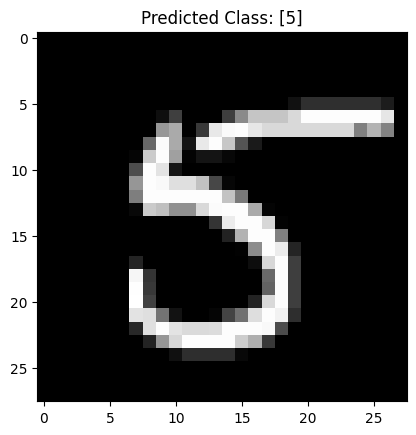

In [ ]:
train_f=train_features[0].reshape(1, max_length)
predicted_class = classifier.predict(train_f)

# Display the image and its predicted class
plt.imshow(img[0], cmap='gray')  # Assuming grayscale images
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

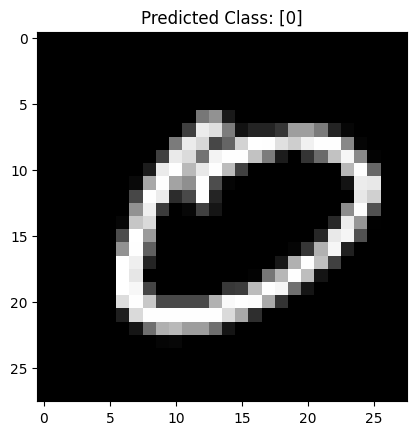

In [ ]:
train_f=train_features[1].reshape(1, max_length)
predicted_class = classifier.predict(train_f)
plt.imshow(img[1], cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

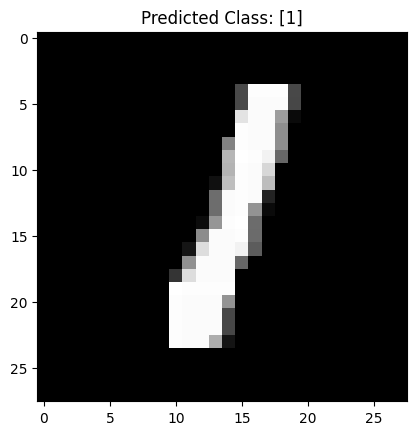

In [ ]:
train_f=train_features[2].reshape(1, max_length)
predicted_class = classifier.predict(train_f)

    # Display the image and its predicted class
plt.imshow(img[2], cmap='gray')  # Assuming grayscale images
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

# KMeans

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Define k-means function
def kmeans(X, k, max_iters=10000):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
    return centroids, labels

k = 10
centroids, labels = kmeans(train_features, k)

In [ ]:
# Assign cluster labels
cluster_labels = np.zeros_like(labels)
for i in range(k):
    mask = (labels == i)
    print(y_train)
    cluster_labels[mask] = np.bincount(y_train[mask]).argmax()
    print(cluster_labels)

# Compute accuracy
accuracy = accuracy_score(y_train, cluster_labels)
print("Accuracy:", accuracy)


[5 0 1 ... 0 0 4]
[0 0 0 ... 0 0 0]
[5 0 1 ... 0 0 4]
[0 0 0 ... 0 0 0]
[5 0 1 ... 0 0 4]
[3 0 0 ... 0 0 0]
[5 0 1 ... 0 0 4]
[3 0 9 ... 9 0 0]
[5 0 1 ... 0 0 4]
[3 0 9 ... 9 0 1]
[5 0 1 ... 0 0 4]
[3 0 9 ... 9 0 1]
[5 0 1 ... 0 0 4]
[3 0 9 ... 9 0 1]
[5 0 1 ... 0 0 4]
[3 8 9 ... 9 8 1]
[5 0 1 ... 0 0 4]
[3 8 9 ... 9 8 1]
[5 0 1 ... 0 0 4]
[3 8 9 ... 9 8 1]
Accuracy: 0.40941666666666665


In [ ]:
# Compare with sklearn's KMeans
from sklearn.cluster import KMeans as sklearn_KMeans

kmeans_sklearn = sklearn_KMeans(n_clusters=10, max_iter=10000)
kmeans_sklearn.fit(train_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=10)

In [ ]:
labels_sklearn = kmeans_sklearn.predict(train_features)

In [ ]:
accuracy = accuracy_score(y_train, labels_sklearn)
print("Accuracy:", accuracy)

Accuracy: 0.16204166666666667


In [ ]:
# Assign cluster labels
cluster_labels = np.zeros_like(labels_sklearn)
for i in range(k):
    mask = (labels_sklearn == i)
    print(y_train)
    cluster_labels[mask] = np.bincount(y_train[mask]).argmax()
    print(cluster_labels)

# Compute accuracy
accuracy = accuracy_score(y_train, cluster_labels)
print("Accuracy:", accuracy)

[5 0 1 ... 0 0 4]
[0 0 0 ... 0 0 0]
[5 0 1 ... 0 0 4]
[0 0 0 ... 0 0 1]
[5 0 1 ... 0 0 4]
[0 8 0 ... 0 8 1]
[5 0 1 ... 0 0 4]
[0 8 0 ... 0 8 1]
[5 0 1 ... 0 0 4]
[0 8 0 ... 0 8 1]
[5 0 1 ... 0 0 4]
[3 8 0 ... 0 8 1]
[5 0 1 ... 0 0 4]
[3 8 0 ... 0 8 1]
[5 0 1 ... 0 0 4]
[3 8 9 ... 9 8 1]
[5 0 1 ... 0 0 4]
[3 8 9 ... 9 8 1]
[5 0 1 ... 0 0 4]
[3 8 9 ... 9 8 1]
Accuracy: 0.39791666666666664


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Define k-means function
def kmeans(X, k, max_iters=60000):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids

    return centroids, labels

k = 10

# Run K-means algorithm
centroids, labels = kmeans(test_features, k)

In [ ]:
# Assign cluster labels
cluster_labels = np.zeros_like(labels)
for i in range(k):
    mask = (labels == i)
    print(y_test)
    cluster_labels[mask] = np.bincount(y_test[mask]).argmax()
    print(cluster_labels)

# Compute accuracy
accuracy = accuracy_score(y_test, cluster_labels)
print("Accuracy:", accuracy)


[7 3 8 ... 9 7 2]
[0 0 0 ... 0 0 0]
[7 3 8 ... 9 7 2]
[0 0 0 ... 0 0 0]
[7 3 8 ... 9 7 2]
[7 0 0 ... 0 7 0]
[7 3 8 ... 9 7 2]
[7 0 0 ... 0 7 0]
[7 3 8 ... 9 7 2]
[7 0 0 ... 0 7 0]
[7 3 8 ... 9 7 2]
[7 3 0 ... 0 7 3]
[7 3 8 ... 9 7 2]
[7 3 0 ... 0 7 3]
[7 3 8 ... 9 7 2]
[7 3 0 ... 0 7 3]
[7 3 8 ... 9 7 2]
[7 3 1 ... 0 7 3]
[7 3 8 ... 9 7 2]
[7 3 1 ... 9 7 3]
Accuracy: 0.449
